<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Connor_Heraty_LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

In [0]:
import random
random.seed(42)
#dir(random)  # Reminding ourselves what we can do here

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [24]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [25]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=150.42273427770718, mobile=False), User(purchased=True, time_on_site=284.06235530493245, mobile=True), User(purchased=True, time_on_site=140.37976895454653, mobile=True), User(purchased=True, time_on_site=49.206452507812216, mobile=True), User(purchased=False, time_on_site=167.81563803588924, mobile=True), User(purchased=False, time_on_site=20.484876517641524, mobile=True), User(purchased=False, time_on_site=167.3540069049869, mobile=True), User(purchased=False, time_on_site=447.75054592529114, mobile=False), User(purchased=True, time_on_site=57.93525538719398, mobile=True), User(purchased=True, time_on_site=292.6494305470663, mobile=True)]


In [26]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,150.422734,False
1,True,284.062355,True
2,True,140.379769,True
3,True,49.206453,True
4,False,167.815638,True


In [27]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.789338167851291,5.836487686604824,7.267690340465448,7.280322437947023,7.733814701629437,7.772242279186957,7.994578759409748,8.373541587279558,9.106003254765849,9.38379653305911,...,582.5363605031145,582.9362427920347,588.8783154469735,590.65747470592,593.8187768755912,597.1381204299279,597.7116143416571,598.547187832115,599.088120104121,599.5766563635087
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,1,0,1,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,1
True,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [28]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(5.196, 124.547]","(124.547, 243.304]","(243.304, 362.062]","(362.062, 480.819]","(480.819, 599.577]"
purchased,,,,,
False,227,238,111,23,37
True,106,133,84,20,21


In [0]:
# We can make this a bit clearer by normalizing (getting %)
variable_name = pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

In [30]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.704,0.613333
True,0.296,0.386667


In [41]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

variable_name = pd.crosstab(user_Data['mobile'], [user_data['purchased'],
                      time_bins], rownames=])

SyntaxError: ignored

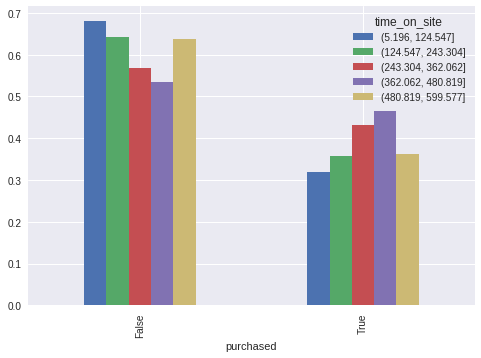

In [43]:
variable_name.plot(kind='bar', stacked=False);

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

**Import the Data into our Notebook**

In [0]:
url = 'https://raw.githubusercontent.com/connorpheraty/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-databackedassertions/persons.csv'
df = pd.read_csv(url)

**Run functions to see Dataset Characteristics**

In [49]:
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
Unnamed: 0       1200 non-null int64
age              1200 non-null int64
weight           1200 non-null int64
exercise_time    1200 non-null int64
dtypes: int64(4)
memory usage: 37.6 KB


**Assignment Question #1**

The dataset contains discrete variables only. Per the .info() function they are 'non-null int64' objects.

In [57]:
df.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


Lets run a simple histogram to see how are features are distributed

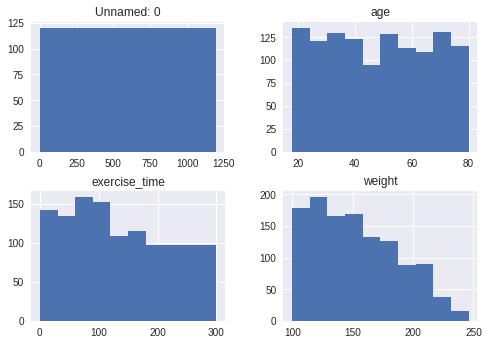

In [150]:
df.hist()
plt.show()

# It appears our age column is uniformly distributed.
# The weight and exercise_time columns skew to the left.

**Organizing our Data**

Before we make any visualizations, lets group our observations into bins for ease of analysis.

In [0]:
# Creating seperate equal sized bins to divide our 3 features
age_bins = pd.cut(df['age'], 5) # 5 Equal-sized bins
weight_bins = pd.cut(df['weight'], 6)  # 6 Equal-sized bins
exercise_bins = pd.cut(df['exercise_time'], 4) # 4 Equal-sized bins

# Creating cross tables based on our binned observations
age_weight_binned_df = pd.crosstab(age_bins, weight_bins)
ex_weight_binned_df = pd.crosstab(exercise_bins, weight_bins)
age_ex_binned_df = pd.crosstab(age_bins, exercise_bins)
ex_age_binned_df = pd.crosstab(exercise_bins, age_bins) 

In [151]:
# Example of one of our cross tables
age_weight_binned_df

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
age,,,,,,
"(17.938, 30.4]",70,68,60,30,23,5
"(30.4, 42.8]",82,62,46,30,28,5
"(42.8, 55.2]",56,69,42,29,22,5
"(55.2, 67.6]",38,61,47,34,34,8
"(67.6, 80.0]",48,44,58,45,35,16


**Visualizations**

Lets see if we can find any relationships between our variables.

For our first bar graph I wanted to see if there was any significant relationship between weight and age. 
While you can see that their is a general trend towards higher weight classes, it does not appear to be a significant finding. 

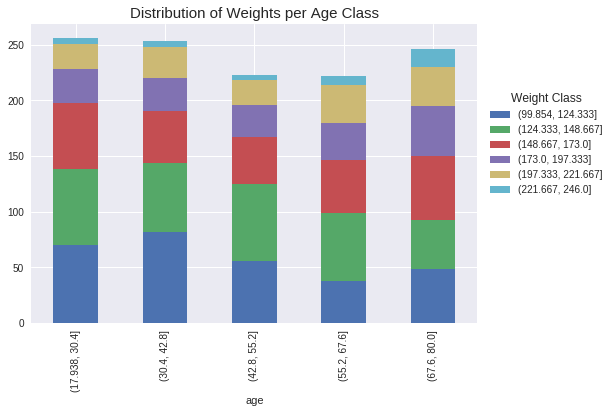

In [139]:
# Plotting age to weight crosstable
ax = age_weight_binned_df.plot(kind='bar',stacked=True)
ax.legend(title='Weight Class',loc='upper right', bbox_to_anchor=(1.3,.8))
plt.title('Distribution of Weights per Age Class', size=15)

plt.show()

This next graph plots our weight to exercise_time cross table. Here we can clearly see a relationship between the two variables.
Our top two weight classes exist almost exclusively in the 0.3 - 150 minutes per week bins. 
The bin that represents the most time spent exercising exclusively contains members from the lowest 3 age bins.
This appears to be a significant finding.

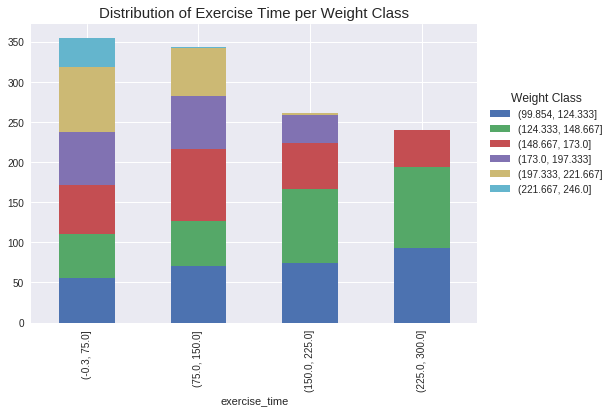

In [140]:
# Plotting the weight to exercise_time crosstable
ex_ax = ex_weight_binned_df.plot(kind='bar', stacked=True)
ex_ax.legend(title='Weight Class', loc='upper right', bbox_to_anchor=(1.3, .8))
plt.title('Distribution of Exercise Time per Weight Class', size=15)
plt.show()

The next graph plots the relationship between exercise time and age. Here we can see that members of the most 
elderly group see a steep drop in exercise time after 150 minutes per week, and drop off completely in the 225+ exercise per
week group. 


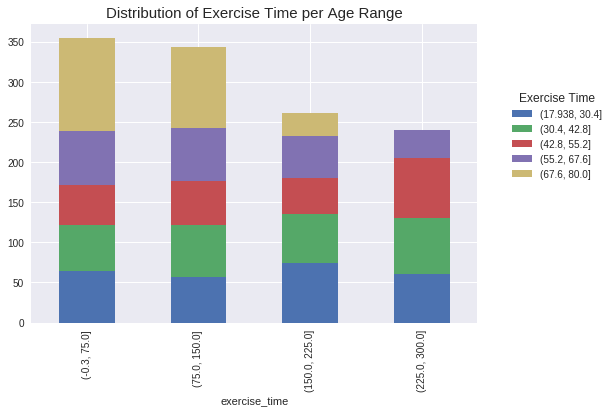

In [148]:
# Plotting the exercise_time to age crosstable
ex_age_ax = ex_age_binned_df.plot(kind='bar', stacked=True)
ex_age_ax.legend(title= 'Exercise Time', loc='upper right', bbox_to_anchor=(1.3, .8))
plt.title('Distribution of Exercise Time per Age Range', size=15)
plt.show()

**Scatter Plot **

This scatter plot does an excellent job of visualizing the findings I made with the stacked bar graphs in one plot.

**Assignment Question #2**

1. We can see a clear and steady drop off in Exercise Time for individuals in our dataset that are over the age of 60.
2. Our heavier individuals plotted in red are clearly more heavily populated near the lower ends of our graph.

**Assignment Question #3**

It can be inferred that the age to exercise time relationship is real. People generally lose stamina as they age and that relationship is clear within the data.

The weight to exercise time relationship appears to be real as well. Heavier people are either generally out of shape and have lower stamina or have more muscle and engage in higher intensity exercises that require less time. 

Exercise time is a flawed measurement as it does not measure the intensity/effectiveness of the exercise.

This dataset is insufficient to make any assertions in regards to the general health of any of the individuals. 


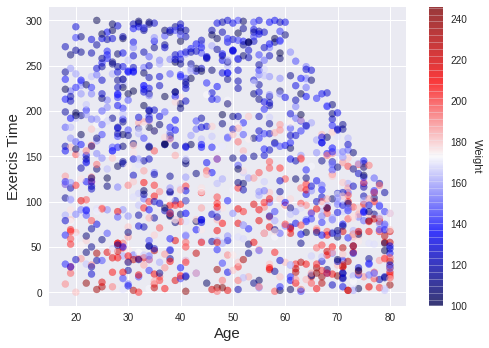

In [190]:
# Scatter Plot
ax = plt.scatter(df['age'],df['exercise_time'],c=df['weight'],cmap='seismic', alpha=.5)

# Labeling
plt.xlabel('Age', size=15)
plt.ylabel('Exercis Time', size=15)

# Colorbar
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Weight', rotation=270)

plt.show()


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)